In [1]:
import networkx as nx
import pandas as pd
import itertools
import json
import matplotlib.pyplot as plt
import numpy as np

## DATA: A Monday in July

In [56]:
path_j = 'July/VI_J00.csv'
data_j = pd.read_csv(path_j, delimiter=",")
data_j.columns = ["Origin", "Destination", "Year", "Month","Day", "Period", "Mode",
                "Distance", "Residence","Activity_Source", "Activity_Destination", 
                "Travelers", "Travelers -km "]

#D1: trips between 10 and 50 km.
#D2: trips of more than 50 km.
#P1: 00:00 - 06:00
#P2: 06:00 - 10:00
#P3: 10:00 - 17:00
#P4: 17:00 - 00:00
#Mode : autobús/avión/barco/carretera/privado/tren

## DATA: A Saturday in July

In [57]:
path_j_sat = 'July/VI_J05.csv'
data_j_sat = pd.read_csv(path_j_sat, delimiter=",")
data_j_sat.columns = ["Origin", "Destination", "Year", "Month","Day", "Period", "Mode",
                "Distance", "Residence","Activity_Source", "Activity_Destination", 
                "Travelers", "Travelers -km "]


## DATA: A Monday in October

In [58]:
path_oct = 'October/VI_O00.csv'
data_oct = pd.read_csv(path_oct, delimiter=",")
data_oct.columns = ["Origin", "Destination", "Year", "Month","Day", "Period", "Mode",
                "Distance", "Residence","Activity_Source", "Activity_Destination", 
                "Travelers", "Travelers -km "]

/share/apps/anaconda-ci/fgci-centos7-generic/software/anaconda/2020-05-tf2/85245f72/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## DATA: A Saturday in October

In [59]:
path_oct_sat = 'October/VI_O05.csv'
data_oct_sat = pd.read_csv(path_oct_sat, delimiter=",")
data_oct_sat.columns = ["Origin", "Destination", "Year", "Month","Day", "Period", "Mode",
                "Distance", "Residence","Activity_Source", "Activity_Destination", 
                "Travelers", "Travelers -km "]


## Pre-processing data

In [60]:
data_j["Origin"] = data_j["Origin"].astype(int)
data_j["Destination"] = data_j["Destination"].astype(int)
data_j["Travelers"] = data_j["Travelers"].str.replace(r'\,','').astype(int)

data_oct["Origin"] = data_oct["Origin"].astype(int)
data_oct["Destination"] = data_oct["Destination"].astype(int)
data_oct["Travelers"] = data_oct["Travelers"].str.replace(r'\,','').astype(int)



data_j_sat["Origin"] = data_j_sat["Origin"].astype(int)
data_j_sat["Destination"] = data_j_sat["Destination"].astype(int)
data_j_sat["Travelers"] = data_j_sat["Travelers"].str.replace(r'\,','').astype(int)

data_oct_sat["Origin"] = data_oct_sat["Origin"].astype(int)
data_oct_sat["Destination"] = data_oct_sat["Destination"].astype(int)
data_oct_sat["Travelers"] = data_oct_sat["Travelers"].str.replace(r'\,','').astype(int)


In [61]:
data_j = data_j[["Origin", "Destination", "Period", "Mode","Distance", "Travelers"]]
data_oct = data_oct[["Origin", "Destination", "Period", "Mode","Distance", "Travelers"]]

data_j_sat = data_j_sat[["Origin", "Destination", "Period", "Mode","Distance", "Travelers"]]
data_oct_sat = data_oct_sat[["Origin", "Destination", "Period", "Mode","Distance", "Travelers"]]

In [62]:
data_oct_sat

,Origin,Destination,Period,Mode,Distance,Travelers
0,1,2,P1,privado,D2,854
1,1,2,P2,privado,D2,7868
2,1,3,P1,avión,D2,10212
3,1,3,P2,autobús,D2,2078
4,1,3,P2,privado,D2,8416
...,...,...,...,...,...,...
49802,52,29,P4,barco,D2,3334
49803,52,29,P4,barco,D2,5097
49804,52,29,P4,barco,D2,5683
49805,52,30,P3,barco,D2,7279


In [75]:
p1_data_j = data_j[data_j["Period" ] == 'P1'] # data for travelers who travled in period 1
p2_data_j = data_j[data_j["Period" ] == 'P2'] # data for travelers who travled in period 2
p3_data_j = data_j[data_j["Period" ] == 'P3'] # data for travelers who travled in period 3
p4_data_j = data_j[data_j["Period" ] == 'P4'] # data for travelers who travled in period 4

p1_data_oct = data_oct[data_oct["Period" ] == 'P1'] # data for travelers who travled in period 1
p2_data_oct = data_oct[data_oct["Period" ] == 'P2'] # data for travelers who travled in period 2
p3_data_oct = data_oct[data_oct["Period" ] == 'P3'] # data for travelers who travled in period 3
p4_data_oct = data_oct[data_oct["Period" ] == 'P4'] # data for travelers who travled in period 4


## Sub dataframes:

In [76]:
o1_p1_j = p1_data_j[p1_data_j["Origin" ] == 1]# data for travelers who travled in period 1 and from origin 1
o1_p2_j = p2_data_j[p2_data_j["Origin" ] == 1]# data for travelers who travled in period 2 and from origin 1
o1_p3_j = p3_data_j[p3_data_j["Origin" ] == 1]# data for travelers who travled in period 3 and from origin 1
o1_p4_j = p4_data_j[p4_data_j["Origin" ] == 1]# data for travelers who travled in period 4 and from origin 1

d1_p1_j = p1_data_j[p1_data_j["Destination" ] == 1]# data for travelers who travled in period 1 and from Destination 1
d1_p2_j = p2_data_j[p2_data_j["Destination" ] == 1]# data for travelers who travled in period 2 and from Destination 1
d1_p3_j = p3_data_j[p3_data_j["Destination" ] == 1]# data for travelers who travled in period 3 and from Destination 1
d1_p4_j = p4_data_j[p4_data_j["Destination" ] == 1]# data for travelers who travled in period 4 and from Destination 1

In [77]:
o1_p1_oct = p1_data_oct[p1_data_oct["Origin" ] == 1]# data for travelers who travled in period 1 and from origin 1
o1_p2_oct = p2_data_oct[p2_data_oct["Origin" ] == 1]# data for travelers who travled in period 2 and from origin 1
o1_p3_oct = p3_data_oct[p3_data_oct["Origin" ] == 1]# data for travelers who travled in period 3 and from origin 1
o1_p4_oct = p4_data_oct[p4_data_oct["Origin" ] == 1]# data for travelers who travled in period 4 and from origin 1

In [78]:
o1_p1_j = o1_p1_j[["Destination", "Travelers"]]
o1_p2_j = o1_p2_j[["Destination", "Travelers"]]
o1_p3_j = o1_p3_j[["Destination", "Travelers"]]
o1_p4_j = o1_p4_j[["Destination", "Travelers"]]

d1_p1_j = d1_p1_j[["Origin", "Travelers"]]
d1_p2_j = d1_p2_j[["Origin", "Travelers"]]
d1_p3_j = d1_p3_j[["Origin", "Travelers"]]
d1_p4_j = d1_p4_j[["Origin", "Travelers"]]


o1_p1_oct = o1_p1_oct[["Destination", "Travelers"]]
o1_p2_oct = o1_p2_oct[["Destination", "Travelers"]]
o1_p3_oct = o1_p3_oct[["Destination", "Travelers"]]
o1_p4_oct = o1_p4_oct[["Destination", "Travelers"]]

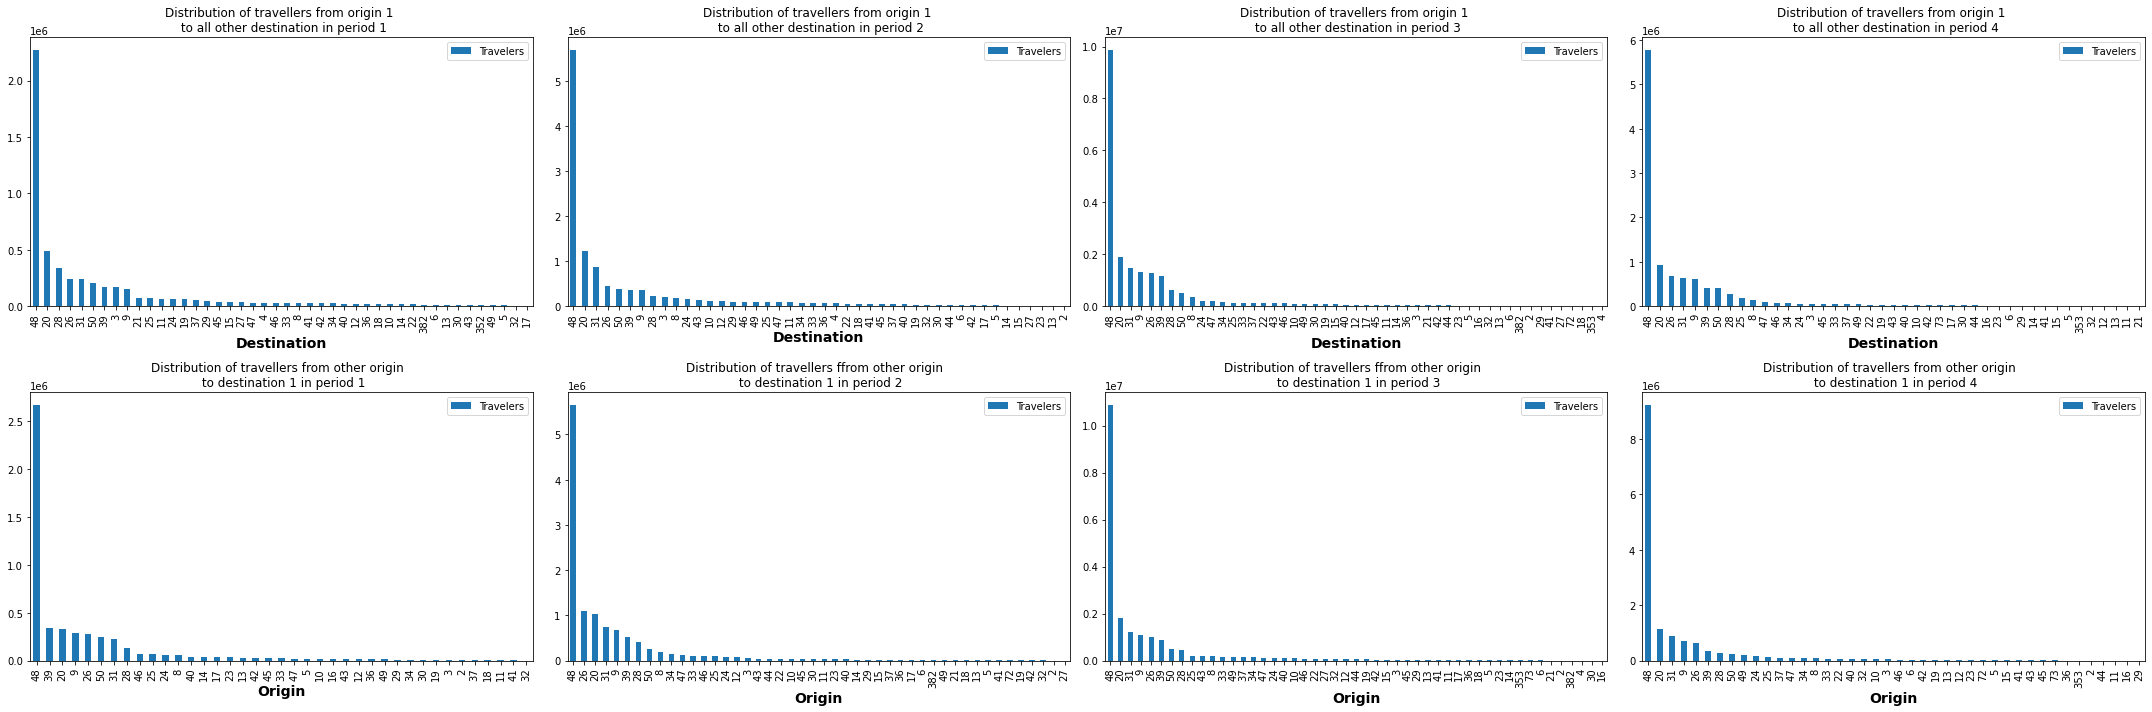

In [79]:
fig, axes = plt.subplots(2,4,figsize=[30,10])
o1_p1_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,0],kind = 'bar', title = "Distribution of travellers from origin 1 \n to all other destination in period 1")
axes[0,0].set_xlabel(axes[0,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o1_p2_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,1],kind = 'bar', title = "Distribution of travellers from origin 1 \n to all other destination in period 2")
axes[0,1].set_xlabel(axes[0,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o1_p3_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,2],kind = 'bar', title = "Distribution of travellers from origin 1 \n to all other destination in period 3")
axes[0,2].set_xlabel(axes[0,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o1_p4_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,3],kind = 'bar', title = "Distribution of travellers from origin 1 \n to all other destination in period 4")
axes[0,3].set_xlabel(axes[0,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d1_p1_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,0],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 1 in period 1")
axes[1,0].set_xlabel(axes[1,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d1_p2_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,1],kind = 'bar', title = "Distribution of travellers ffrom other origin  \n to destination 1 in period 2")
axes[1,1].set_xlabel(axes[1,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


d1_p3_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,2],kind = 'bar', title = "Distribution of travellers ffrom other origin  \n to destination 1 in period 3")
axes[1,2].set_xlabel(axes[1,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


d1_p4_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,3],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 1 in period 4")
axes[1,3].set_xlabel(axes[1,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

fig.tight_layout() 


In [81]:
o2_p1_j = p1_data_j[p1_data_j["Origin" ] == 2]# data for travelers who travled in period 1 and from origin 2
o2_p2_j = p2_data_j[p2_data_j["Origin" ] == 2]# data for travelers who travled in period 2 and from origin 2
o2_p3_j = p3_data_j[p3_data_j["Origin" ] == 2]# data for travelers who travled in period 3 and from origin 2
o2_p4_j = p4_data_j[p4_data_j["Origin" ] == 2]# data for travelers who travled in period 4 and from origin 2

d2_p1_j = p1_data_j[p1_data_j["Destination" ] == 2]# data for travelers who travled in period 1 and from Destination 2
d2_p2_j = p2_data_j[p2_data_j["Destination" ] == 2]# data for travelers who travled in period 2 and from Destination 2
d2_p3_j = p3_data_j[p3_data_j["Destination" ] == 2]# data for travelers who travled in period 3 and from Destination 2
d2_p4_j = p4_data_j[p4_data_j["Destination" ] == 2]# data for travelers who travled in period 4 and from Destination 2

In [82]:
o2_p1_oct = p1_data_oct[p1_data_oct["Origin" ] == 2]# data for travelers who travled in period 1 and from origin 2
o2_p2_oct = p2_data_oct[p2_data_oct["Origin" ] == 2]# data for travelers who travled in period 2 and from origin 2
o2_p3_oct = p3_data_oct[p3_data_oct["Origin" ] == 2]# data for travelers who travled in period 3 and from origin 2
o2_p4_oct = p4_data_oct[p4_data_oct["Origin" ] == 2]# data for travelers who travled in period 4 and from origin 2

In [83]:
o2_p1_j = o2_p1_j[["Destination", "Travelers"]]
o2_p2_j = o2_p2_j[["Destination", "Travelers"]]
o2_p3_j = o2_p3_j[["Destination", "Travelers"]]
o2_p4_j = o2_p4_j[["Destination", "Travelers"]]

d2_p1_j = d2_p1_j[["Origin", "Travelers"]]
d2_p2_j = d2_p2_j[["Origin", "Travelers"]]
d2_p3_j = d2_p3_j[["Origin", "Travelers"]]
d2_p4_j = d2_p4_j[["Origin", "Travelers"]]


o2_p1_oct = o2_p1_oct[["Destination", "Travelers"]]
o2_p2_oct = o2_p2_oct[["Destination", "Travelers"]]
o2_p3_oct = o2_p3_oct[["Destination", "Travelers"]]
o2_p4_oct = o2_p4_oct[["Destination", "Travelers"]]

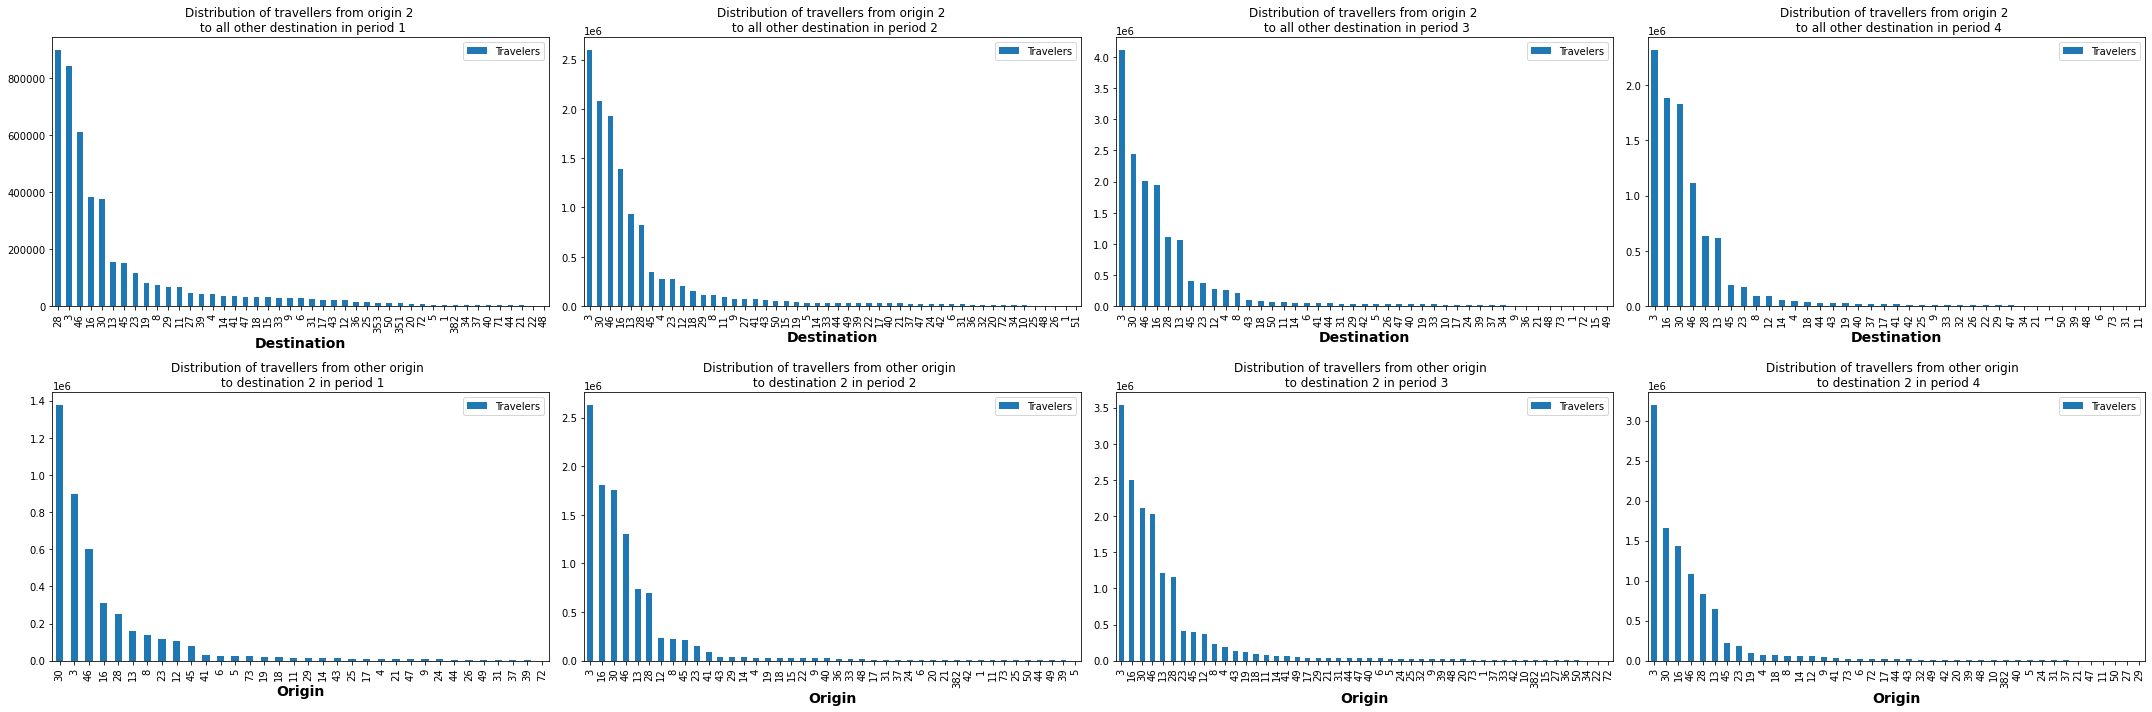

In [84]:
fig, axes = plt.subplots(2,4,figsize=[30,10])
o2_p1_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,0],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination in period 1")
axes[0,0].set_xlabel(axes[0,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o2_p2_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,1],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination in period 2")
axes[0,1].set_xlabel(axes[0,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o2_p3_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,2],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination in period 3")
axes[0,2].set_xlabel(axes[0,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o2_p4_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,3],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination in period 4")
axes[0,3].set_xlabel(axes[0,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d2_p1_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,0],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 2 in period 1")
axes[1,0].set_xlabel(axes[1,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d2_p2_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,1],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 2 in period 2")
axes[1,1].set_xlabel(axes[1,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


d2_p3_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,2],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 2 in period 3")
axes[1,2].set_xlabel(axes[1,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


d2_p4_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,3],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 2 in period 4")
axes[1,3].set_xlabel(axes[1,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

fig.tight_layout() 


In [85]:
o3_p1_j = p1_data_j[p1_data_j["Origin" ] == 3]# data for travelers who travled in period 1 and from origin 3
o3_p2_j = p2_data_j[p2_data_j["Origin" ] == 3]# data for travelers who travled in period 2 and from origin 3
o3_p3_j = p3_data_j[p3_data_j["Origin" ] == 3]# data for travelers who travled in period 3 and from origin 3
o3_p4_j = p4_data_j[p4_data_j["Origin" ] == 3]# data for travelers who travled in period 4 and from origin 3

d3_p1_j = p1_data_j[p1_data_j["Destination" ] == 3]# data for travelers who travled in period 1 and from Destination 3
d3_p2_j = p2_data_j[p2_data_j["Destination" ] == 3]# data for travelers who travled in period 2 and from Destination 3
d3_p3_j = p3_data_j[p3_data_j["Destination" ] == 3]# data for travelers who travled in period 3 and from Destination 3
d3_p4_j = p4_data_j[p4_data_j["Destination" ] == 3]# data for travelers who travled in period 4 and from Destination 3


o3_p1_oct = p1_data_oct[p1_data_oct["Origin" ] == 3]# data for travelers who travled in period 1 and from origin 3
o3_p2_oct = p2_data_oct[p2_data_oct["Origin" ] == 3]# data for travelers who travled in period 2 and from origin 3
o3_p3_oct = p3_data_oct[p3_data_oct["Origin" ] == 3]# data for travelers who travled in period 3 and from origin 3
o3_p4_oct = p4_data_oct[p4_data_oct["Origin" ] == 3]# data for travelers who travled in period 4 and from origin 3


In [86]:
o3_p1_j = o3_p1_j[["Destination", "Travelers"]]
o3_p2_j = o3_p2_j[["Destination", "Travelers"]]
o3_p3_j = o3_p3_j[["Destination", "Travelers"]]
o3_p4_j = o3_p4_j[["Destination", "Travelers"]]

d3_p1_j = d3_p1_j[["Origin", "Travelers"]]
d3_p2_j = d3_p2_j[["Origin", "Travelers"]]
d3_p3_j = d3_p3_j[["Origin", "Travelers"]]
d3_p4_j = d3_p4_j[["Origin", "Travelers"]]


o3_p1_oct = o3_p1_oct[["Destination", "Travelers"]]
o3_p2_oct = o3_p2_oct[["Destination", "Travelers"]]
o3_p3_oct = o3_p3_oct[["Destination", "Travelers"]]
o3_p4_oct = o3_p4_oct[["Destination", "Travelers"]]


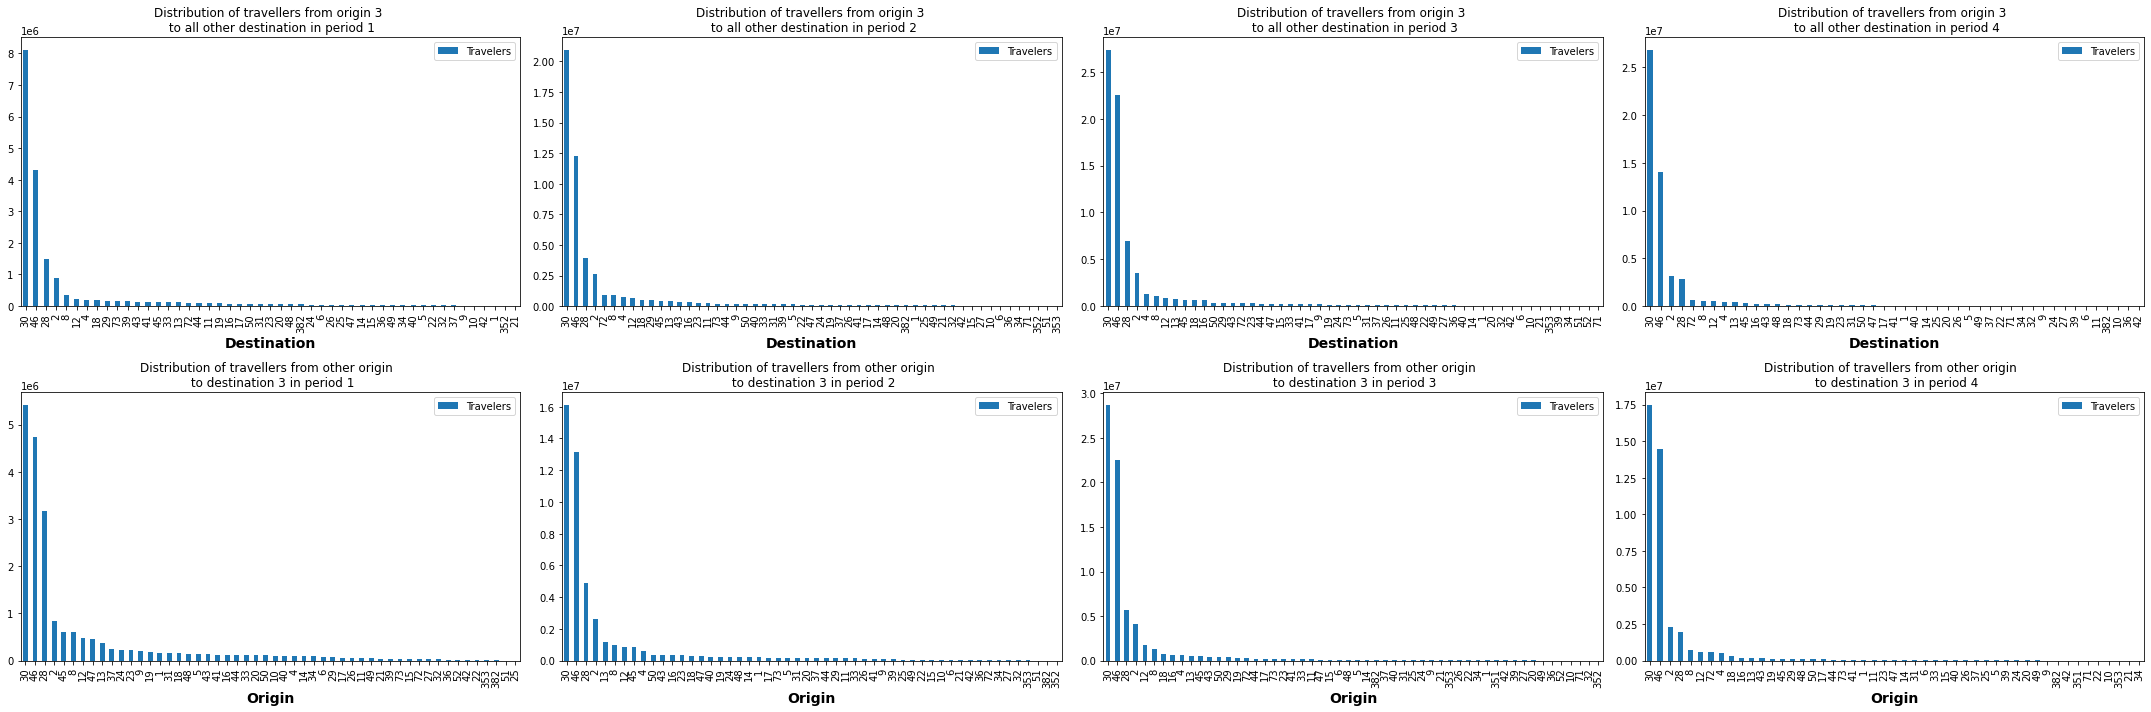

In [87]:
fig, axes = plt.subplots(2,4,figsize=[30,10])
o3_p1_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,0],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination in period 1")
axes[0,0].set_xlabel(axes[0,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o3_p2_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,1],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination in period 2")
axes[0,1].set_xlabel(axes[0,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o3_p3_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,2],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination in period 3")
axes[0,2].set_xlabel(axes[0,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o3_p4_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,3],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination in period 4")
axes[0,3].set_xlabel(axes[0,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d3_p1_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,0],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 3 in period 1")
axes[1,0].set_xlabel(axes[1,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d3_p2_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,1],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 3 in period 2")
axes[1,1].set_xlabel(axes[1,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


d3_p3_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,2],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 3 in period 3")
axes[1,2].set_xlabel(axes[1,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


d3_p4_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,3],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 3 in period 4")
axes[1,3].set_xlabel(axes[1,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

fig.tight_layout() 


In [88]:
o4_p1_j = p1_data_j[p1_data_j["Origin" ] == 3]# data for travelers who travled in period 1 and from origin 4
o4_p2_j = p2_data_j[p2_data_j["Origin" ] == 3]# data for travelers who travled in period 2 and from origin 4
o4_p3_j = p3_data_j[p3_data_j["Origin" ] == 3]# data for travelers who travled in period 3 and from origin 4
o4_p4_j = p4_data_j[p4_data_j["Origin" ] == 3]# data for travelers who travled in period 4 and from origin 4

d4_p1_j = p1_data_j[p1_data_j["Destination" ] == 3]# data for travelers who travled in period 1 and from Destination 4
d4_p2_j = p2_data_j[p2_data_j["Destination" ] == 3]# data for travelers who travled in period 2 and from Destination 4
d4_p3_j = p3_data_j[p3_data_j["Destination" ] == 3]# data for travelers who travled in period 3 and from Destination 4
d4_p4_j = p4_data_j[p4_data_j["Destination" ] == 3]# data for travelers who travled in period 4 and from Destination 4

o4_p1_oct = p1_data_oct[p1_data_oct["Origin" ] == 3]# data for travelers who travled in period 1 and from origin 4
o4_p2_oct = p2_data_oct[p2_data_oct["Origin" ] == 3]# data for travelers who travled in period 2 and from origin 4
o4_p3_oct = p3_data_oct[p3_data_oct["Origin" ] == 3]# data for travelers who travled in period 3 and from origin 4
o4_p4_oct = p4_data_oct[p4_data_oct["Origin" ] == 3]# data for travelers who travled in period 4 and from origin 4


In [89]:
o4_p1_j = o4_p1_j[["Destination", "Travelers"]]
o4_p2_j = o4_p2_j[["Destination", "Travelers"]]
o4_p3_j = o4_p3_j[["Destination", "Travelers"]]
o4_p4_j = o4_p4_j[["Destination", "Travelers"]]

d4_p1_j = d4_p1_j[["Origin", "Travelers"]]
d4_p2_j = d4_p2_j[["Origin", "Travelers"]]
d4_p3_j = d4_p3_j[["Origin", "Travelers"]]
d4_p4_j = d4_p4_j[["Origin", "Travelers"]]

o4_p1_oct = o4_p1_oct[["Destination", "Travelers"]]
o4_p2_oct = o4_p2_oct[["Destination", "Travelers"]]
o4_p3_oct = o4_p3_oct[["Destination", "Travelers"]]
o4_p4_oct = o4_p4_oct[["Destination", "Travelers"]]

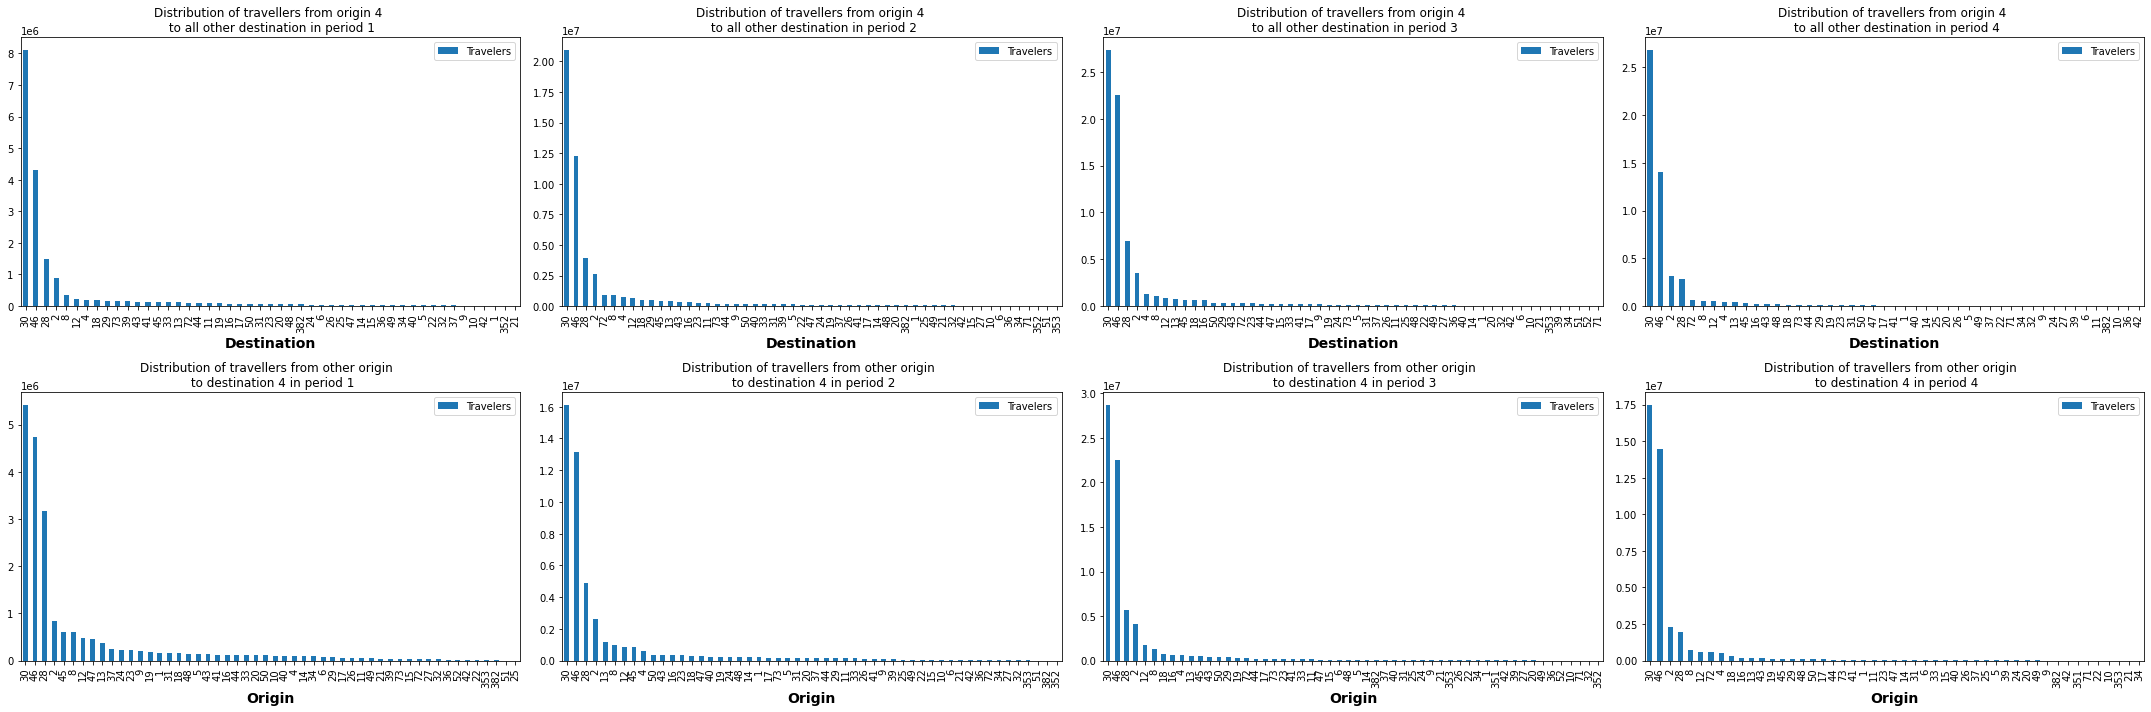

In [90]:
fig, axes = plt.subplots(2,4,figsize=[30,10])
o4_p1_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,0],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination in period 1")
axes[0,0].set_xlabel(axes[0,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o4_p2_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,1],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination in period 2")
axes[0,1].set_xlabel(axes[0,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o4_p3_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,2],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination in period 3")
axes[0,2].set_xlabel(axes[0,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o4_p4_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,3],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination in period 4")
axes[0,3].set_xlabel(axes[0,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d4_p1_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,0],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 4 in period 1")
axes[1,0].set_xlabel(axes[1,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d4_p2_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,1],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 4 in period 2")
axes[1,1].set_xlabel(axes[1,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


d4_p3_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,2],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 4 in period 3")
axes[1,2].set_xlabel(axes[1,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


d4_p4_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,3],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 4 in period 4")
axes[1,3].set_xlabel(axes[1,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

fig.tight_layout() 


In [92]:
all_period_oct = data_oct[["Origin", "Destination", "Travelers"]]

all_period_j = data_j[["Origin", "Destination", "Travelers"]]

all_period_oct_sat = data_oct_sat[["Origin", "Destination", "Travelers"]]

all_period_j_sat = data_j_sat[["Origin", "Destination", "Travelers"]]


In [95]:
o1_j = all_period_j[all_period_j["Origin" ] == 1]# data for travelers who travled from origin 1
d1_j =all_period_j[all_period_j["Destination" ] == 1]# data for travelers who travled from Destination 1

o2_j = all_period_j[all_period_j["Origin" ] == 2]# data for travelers who travled from origin 2
d2_j =all_period_j[all_period_j["Destination" ] == 2]# data for travelers who travled from Destination 2

o3_j = all_period_j[all_period_j["Origin" ] == 3]# data for travelers who travled from origin 3
d3_j =all_period_j[all_period_j["Destination" ] == 3]# data for travelers who travled from Destination 3

o4_j = all_period_j[all_period_j["Origin" ] == 4]# data for travelers who travled from origin 4
d4_j =all_period_j[all_period_j["Destination" ] == 4]# data for travelers who travled from Destination 4

o1_oct = all_period_oct[all_period_oct["Origin" ] == 1]# data for travelers who travled from origin 1

o2_oct = all_period_oct[all_period_oct["Origin" ] == 2]# data for travelers who travled from origin 2

o3_oct = all_period_oct[all_period_oct["Origin" ] == 3]# data for travelers who travled from origin 3

o4_oct = all_period_oct[all_period_oct["Origin" ] == 4]# data for travelers who travled from origin 4


o1_j_sat = all_period_j_sat[all_period_j_sat["Origin" ] == 1]# data for travelers who travled from origin 1

o2_j_sat = all_period_j_sat[all_period_j_sat["Origin" ] == 2]# data for travelers who travled from origin 2

o3_j_sat = all_period_j_sat[all_period_j_sat["Origin" ] == 3]# data for travelers who travled from origin 3

o4_j_sat = all_period_j_sat[all_period_j_sat["Origin" ] == 4]# data for travelers who travled from origin 4

o1_oct_sat = all_period_oct_sat[all_period_oct_sat["Origin" ] == 1]# data for travelers who travled from origin 1

o2_oct_sat = all_period_oct_sat[all_period_oct_sat["Origin" ] == 2]# data for travelers who travled from origin 2

o3_oct_sat = all_period_oct_sat[all_period_oct_sat["Origin" ] == 3]# data for travelers who travled from origin 3

o4_oct_sat = all_period_oct_sat[all_period_oct_sat["Origin" ] == 4]# data for travelers who travled from origin 4



In [99]:
o1_j = o1_j[["Destination", "Travelers"]]
d1_j = d1_j[["Origin", "Travelers"]]

o2_j = o2_j[["Destination", "Travelers"]]
d2_j = d2_j[["Origin", "Travelers"]]

o3_j = o3_j[["Destination", "Travelers"]]
d3_j = d3_j[["Origin", "Travelers"]]

o4_j = o4_j[["Destination", "Travelers"]]
d4_j = d4_j[["Origin", "Travelers"]]

o1_oct = o1_oct[["Destination", "Travelers"]]
o2_oct = o2_oct[["Destination", "Travelers"]]
o3_oct = o3_oct[["Destination", "Travelers"]]
o4_oct = o4_oct[["Destination", "Travelers"]]

o1_j_sat = o1_j_sat[["Destination", "Travelers"]]
o2_j_sat = o2_j_sat[["Destination", "Travelers"]]
o3_j_sat = o3_j_sat[["Destination", "Travelers"]]
o4_j_sat = o4_j_sat[["Destination", "Travelers"]]

o1_oct_sat = o1_oct_sat[["Destination", "Travelers"]]
o2_oct_sat = o2_oct_sat[["Destination", "Travelers"]]
o3_oct_sat = o3_oct_sat[["Destination", "Travelers"]]
o4_oct_sat = o4_oct_sat[["Destination", "Travelers"]]



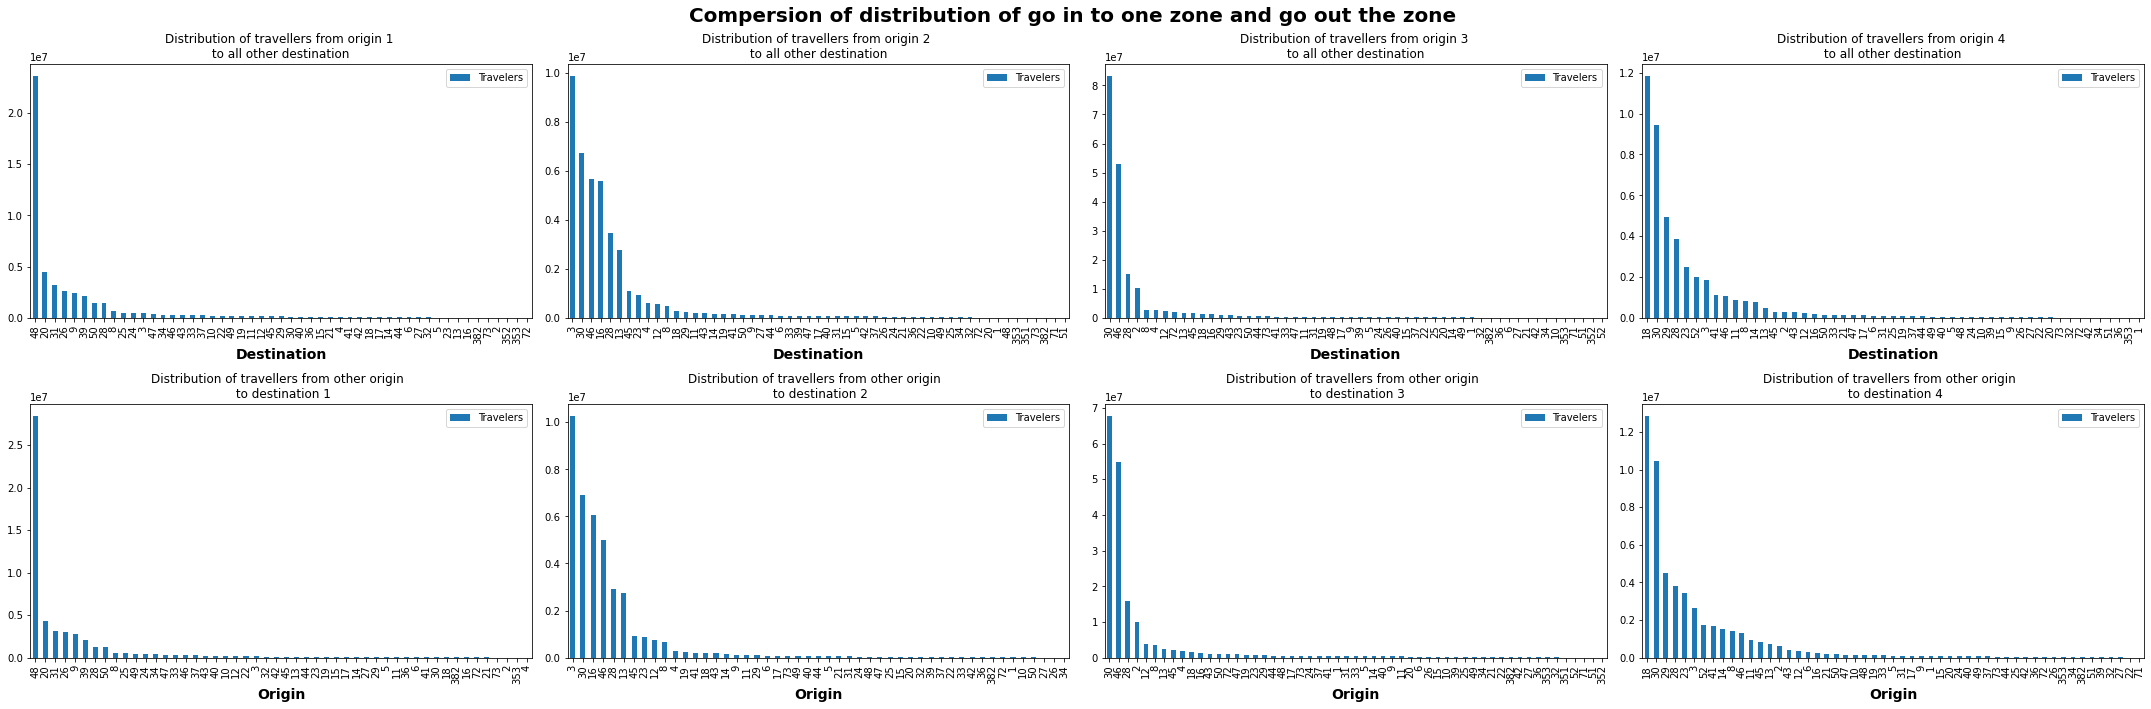

In [106]:
fig, axes = plt.subplots(2,4,figsize=[30,10])
fig.suptitle('Compersion of distribution of go in to one zone and go out the zone ', weight='bold', fontsize=20)

o1_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,0],kind = 'bar', title = "Distribution of travellers from origin 1 \n to all other destination ")
axes[0,0].set_xlabel(axes[0,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d1_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,0],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 1")
axes[1,0].set_xlabel(axes[1,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o2_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,1],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination ")
axes[0,1].set_xlabel(axes[0,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d2_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,1],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 2")
axes[1,1].set_xlabel(axes[1,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o3_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,2],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination ")
axes[0,2].set_xlabel(axes[0,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d3_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,2],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 3")
axes[1,2].set_xlabel(axes[1,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o4_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,3],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination ")
axes[0,3].set_xlabel(axes[0,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

d4_j.groupby(by = "Origin").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,3],kind = 'bar', title = "Distribution of travellers from other origin  \n to destination 4")
axes[1,3].set_xlabel(axes[1,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)


fig.tight_layout() 


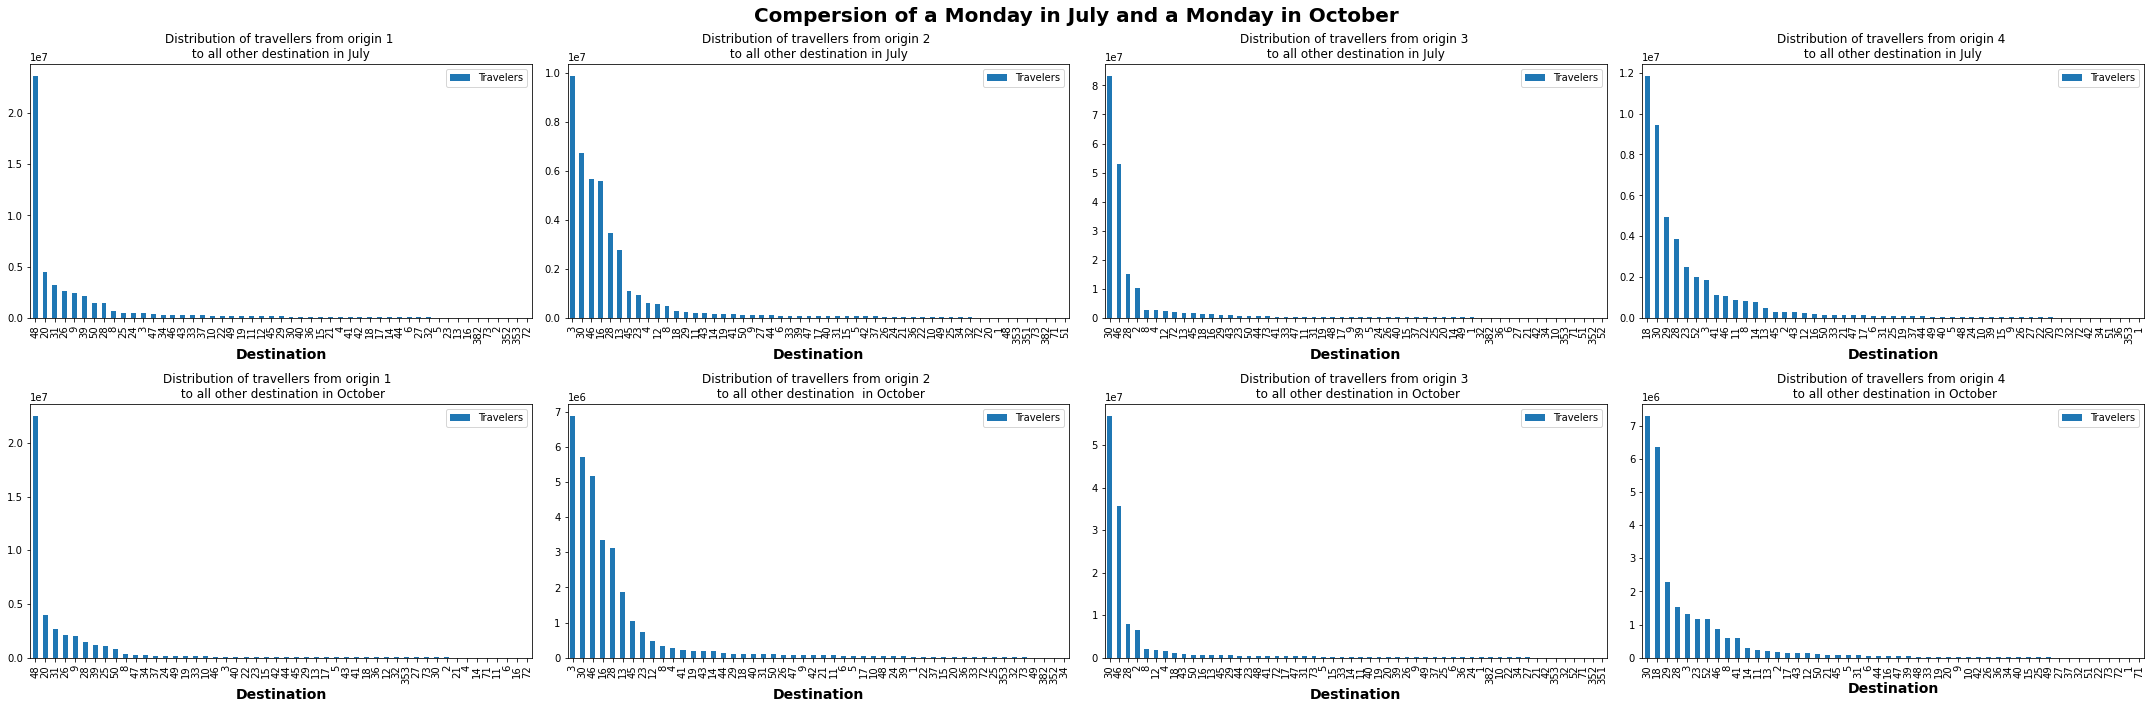

In [105]:
fig, axes = plt.subplots(2,4,figsize=[30,10])
fig.suptitle('Compersion of a Monday in July and a Monday in October', weight='bold', fontsize=20)
o1_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,0],kind = 'bar', title = "Distribution of travellers from origin 1 \n to all other destination in July ")
axes[0,0].set_xlabel(axes[0,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o1_oct.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,0],kind = 'bar', title = "Distribution of travellers from origin 1  \n to all other destination in October")
axes[1,0].set_xlabel(axes[1,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o2_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,1],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination in July ")
axes[0,1].set_xlabel(axes[0,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o2_oct.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,1],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination  in October")
axes[1,1].set_xlabel(axes[1,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o3_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,2],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination in July ")
axes[0,2].set_xlabel(axes[0,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o3_oct.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,2],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination in October")
axes[1,2].set_xlabel(axes[1,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o4_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,3],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination in July ")
axes[0,3].set_xlabel(axes[0,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o4_oct.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,3],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination in October")
axes[1,3].set_xlabel(axes[1,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

fig.tight_layout() 


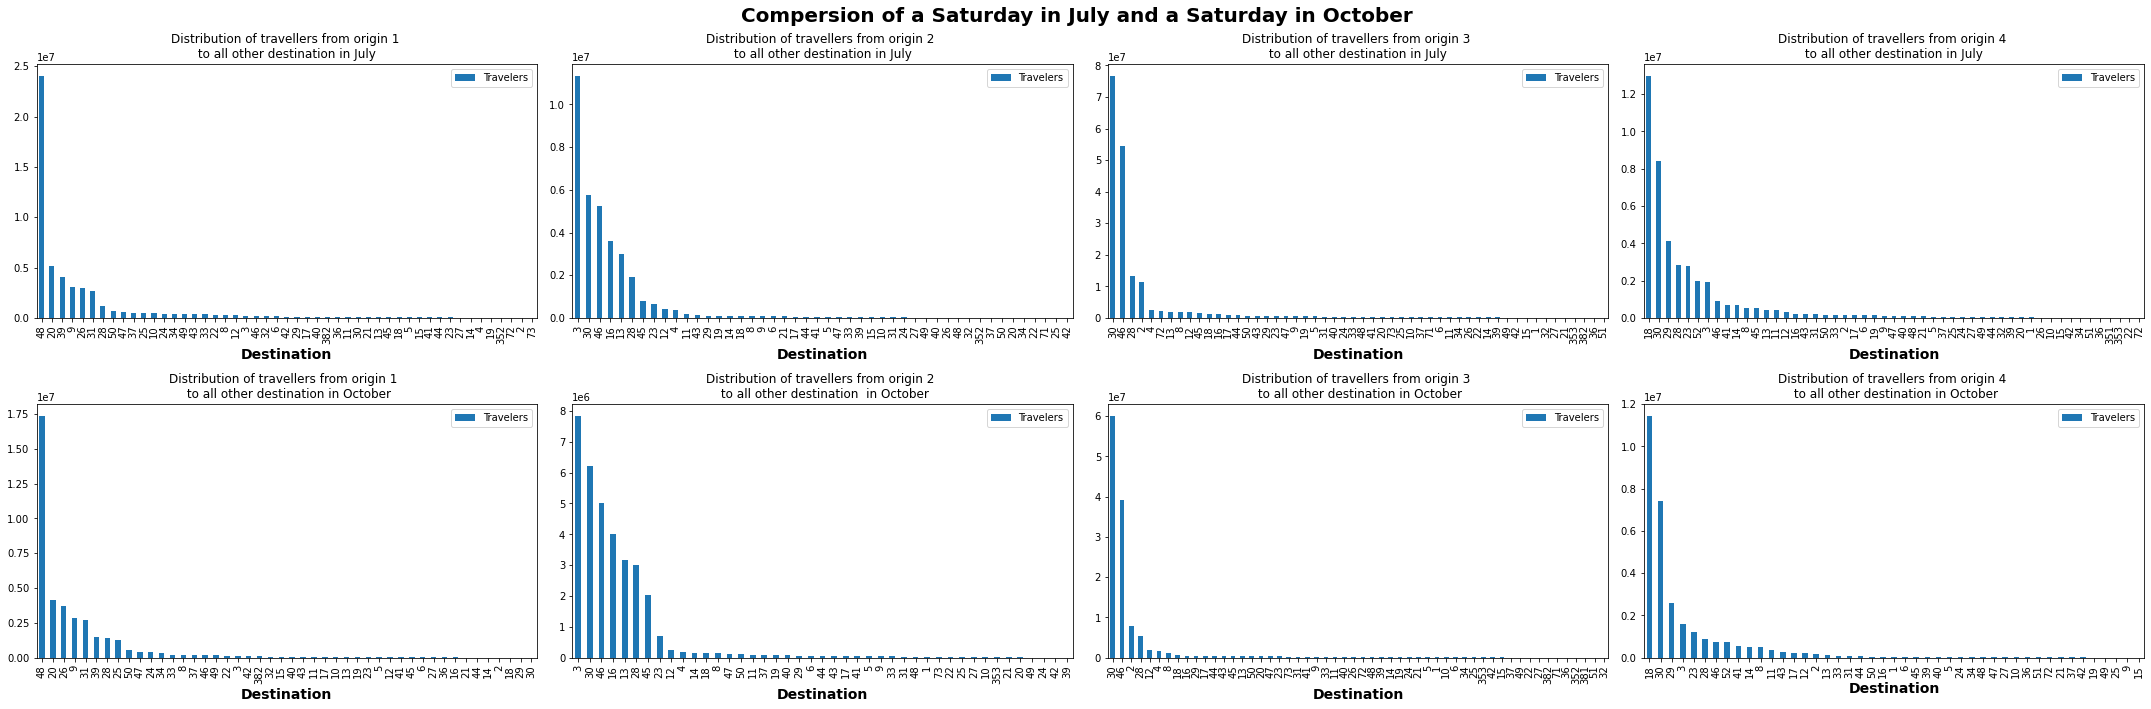

In [107]:
fig, axes = plt.subplots(2,4,figsize=[30,10])
fig.suptitle('Compersion of a Saturday in July and a Saturday in October', weight='bold', fontsize=20)

o1_j_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,0],kind = 'bar', title = "Distribution of travellers from origin 1 \n to all other destination in July ")
axes[0,0].set_xlabel(axes[0,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o1_oct_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,0],kind = 'bar', title = "Distribution of travellers from origin 1  \n to all other destination in October")
axes[1,0].set_xlabel(axes[1,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o2_j_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,1],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination in July ")
axes[0,1].set_xlabel(axes[0,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o2_oct_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,1],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination  in October")
axes[1,1].set_xlabel(axes[1,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o3_j_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,2],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination in July ")
axes[0,2].set_xlabel(axes[0,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o3_oct_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,2],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination in October")
axes[1,2].set_xlabel(axes[1,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o4_j_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,3],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination in July ")
axes[0,3].set_xlabel(axes[0,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o4_oct_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,3],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination in October")
axes[1,3].set_xlabel(axes[1,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

fig.tight_layout() 


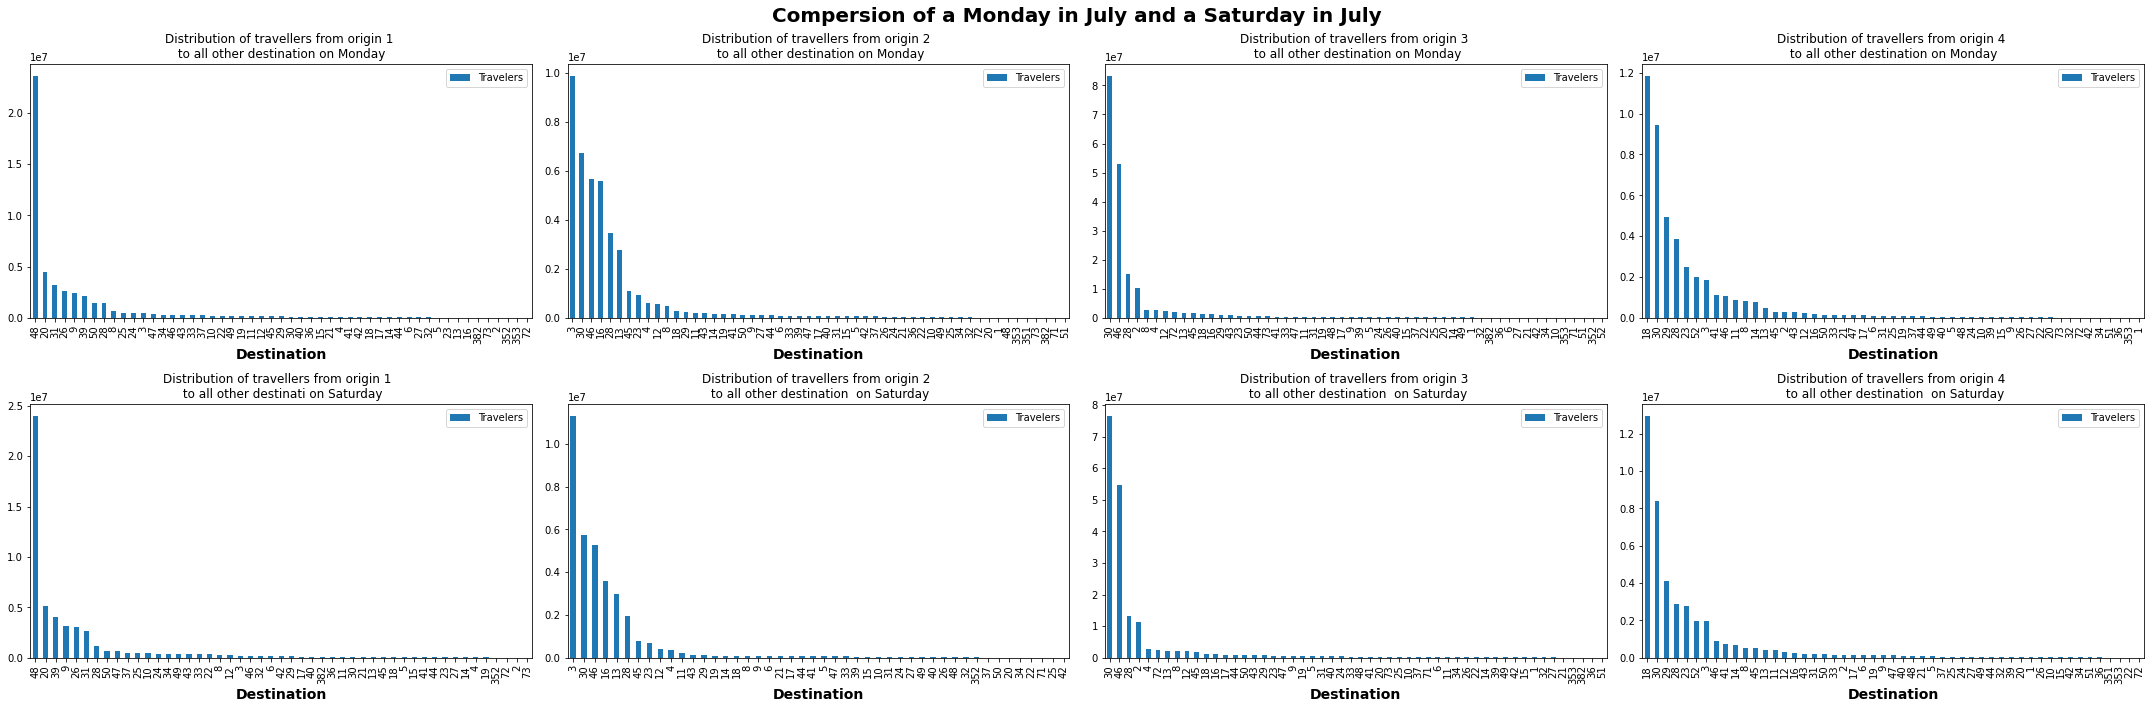

In [111]:
fig, axes = plt.subplots(2,4,figsize=[30,10])
fig.suptitle('Compersion of a Monday in July and a Saturday in July', weight='bold', fontsize=20)

o1_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,0],kind = 'bar', title = "Distribution of travellers from origin 1 \n to all other destination on Monday ")
axes[0,0].set_xlabel(axes[0,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o1_j_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,0],kind = 'bar', title = "Distribution of travellers from origin 1  \n to all other destinati on Saturday")
axes[1,0].set_xlabel(axes[1,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o2_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,1],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination on Monday")
axes[0,1].set_xlabel(axes[0,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o2_j_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,1],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination  on Saturday")
axes[1,1].set_xlabel(axes[1,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o3_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,2],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination on Monday")
axes[0,2].set_xlabel(axes[0,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o3_j_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,2],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination  on Saturday")
axes[1,2].set_xlabel(axes[1,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o4_j.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,3],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination on Monday ")
axes[0,3].set_xlabel(axes[0,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o4_j_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,3],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination  on Saturday")
axes[1,3].set_xlabel(axes[1,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

fig.tight_layout() 


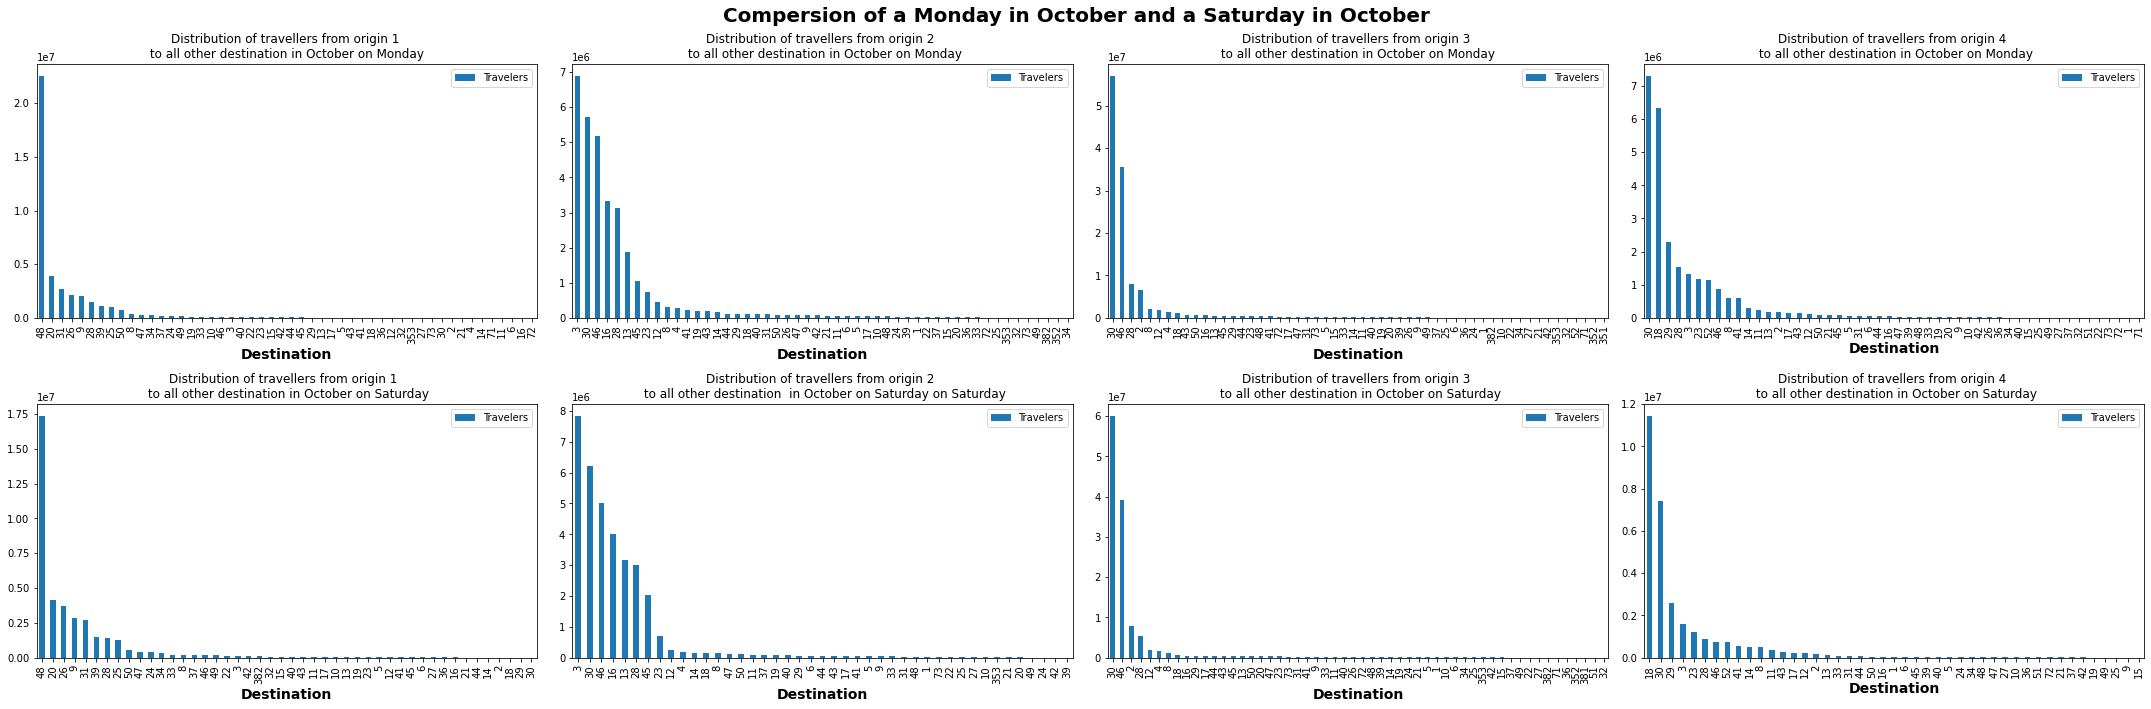

In [110]:
fig, axes = plt.subplots(2,4,figsize=[30,10])
fig.suptitle('Compersion of a Monday in October and a Saturday in October', weight='bold', fontsize=20)

o1_oct.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,0],kind = 'bar', title = "Distribution of travellers from origin 1 \n to all other destination in October on Monday ")
axes[0,0].set_xlabel(axes[0,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o1_oct_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,0],kind = 'bar', title = "Distribution of travellers from origin 1  \n to all other destination in October on Saturday")
axes[1,0].set_xlabel(axes[1,0].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o2_oct.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,1],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination in October on Monday")
axes[0,1].set_xlabel(axes[0,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o2_oct_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,1],kind = 'bar', title = "Distribution of travellers from origin 2 \n to all other destination  in October on Saturday on Saturday")
axes[1,1].set_xlabel(axes[1,1].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o3_oct.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,2],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination in October on Monday ")
axes[0,2].set_xlabel(axes[0,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o3_oct_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,2],kind = 'bar', title = "Distribution of travellers from origin 3 \n to all other destination in October on Saturday")
axes[1,2].set_xlabel(axes[1,2].xaxis.get_label().get_text(), weight='bold', fontsize=14)


o4_oct.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[0,3],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination in October on Monday")
axes[0,3].set_xlabel(axes[0,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

o4_oct_sat.groupby(by = "Destination").sum().sort_values("Travelers", ascending = False).plot(ax = axes[1,3],kind = 'bar', title = "Distribution of travellers from origin 4 \n to all other destination in October on Saturday")
axes[1,3].set_xlabel(axes[1,3].xaxis.get_label().get_text(), weight='bold', fontsize=14)

fig.tight_layout() 
